In [1]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# Hàm trích xuất MFCC và tính các thống kê (mean, variance, min, max)
def extract_mfcc_statistics(audio, sr=16000, n_mfcc=13):
    hop_length = int(0.01 * sr)  # 10 ms hop length
    win_length = int(0.025 * sr)  # 25 ms window length

    # Trích xuất MFCC
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, win_length=win_length, window='hamming')
    
    # Tính các thống kê (mean, variance, min, max) theo từng MFCC
    mfcc_mean = np.mean(mfccs, axis=1)
    mfcc_var = np.var(mfccs, axis=1)
    mfcc_min = np.min(mfccs, axis=1)
    mfcc_max = np.max(mfccs, axis=1)
    
    # Ghép các đặc trưng lại thành một vector
    features = np.concatenate([mfcc_mean, mfcc_var, mfcc_min, mfcc_max])
    
    return features

In [4]:
# Hàm load dữ liệu
def load_data_for_xgboost(data_dir):
    X = []
    y = []
    labels = os.listdir(data_dir)
    
    for label in labels:
        label_dir = os.path.join(data_dir, label)
        for file_name in os.listdir(label_dir):
            if file_name.endswith(".wav"):
                file_path = os.path.join(label_dir, file_name)
                # Load file âm thanh
                audio, sr = librosa.load(file_path, sr=None)
                features = extract_mfcc_statistics(audio, sr)
                X.append(features)
                y.append(label)
    
    return np.array(X), np.array(y)

In [5]:
# Load dữ liệu
train_data_dir = r'C:\Users\USER\Downloads\SV_NCKH_audio_event\Train'
test_data_dir = r'C:\Users\USER\Downloads\SV_NCKH_audio_event\Test'

X_train, y_train = load_data_for_xgboost(train_data_dir)
X_test, y_test = load_data_for_xgboost(test_data_dir)

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Áp dụng mô hình XGBoost
model = xgb.XGBClassifier(
    n_estimators=100,  # Số lượng cây
    max_depth=6,       # Độ sâu tối đa của cây
    learning_rate=0.1, # Tốc độ học
    random_state=42    # Đảm bảo kết quả tái lập
)

# Huấn luyện mô hình
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [6]:
# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5857338820301783
Classification Report:
              precision    recall  f1-score   support

      Sound0       0.62      0.15      0.24        67
      Sound1       0.33      0.05      0.08        44
     Sound10       0.60      0.86      0.71        64
     Sound11       0.58      0.68      0.63        47
     Sound12       1.00      0.29      0.44        14
     Sound13       1.00      0.82      0.90        51
     Sound14       0.43      1.00      0.61        30
     Sound15       1.00      1.00      1.00         2
     Sound16       0.15      0.08      0.10        66
     Sound17       0.41      0.61      0.49        64
     Sound18       0.00      0.00      0.00         8
     Sound19       0.20      0.09      0.12        23
      Sound2       0.98      0.95      0.96        55
     Sound20       0.48      0.96      0.64        46
      Sound3       1.00      1.00      1.00        15
      Sound4       0.75      0.90      0.81        88
      Sound5       0.29      

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefin

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\core.py:158: UserWarning: [14:04:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[12  0 13  2  0  0 24  1  7  0  0  0  0  0  0  0  1  0  5  1  1]
 [ 0  3  0  0  0  0  0  0  3 11  0  4  2 19  0  2  0  0  0  0  0]
 [ 1  0 56  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  1 34  0  0  0  0  8  1  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0 46  0  0  1  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7 16  0  0  0  0  8 14  0  0  0  8  0 12  0  0  0  0  0]
 [ 0  3  3  1  0  0  0  0  0 38  0  4  0  5  0  7  0  0  0  2  1]
 [ 1  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  9  0  1  0  4  0  3  0  0  0  0  5]
 [ 0  0  0  2  0  0  0  0  0  0  0  0 53  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0 42  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0

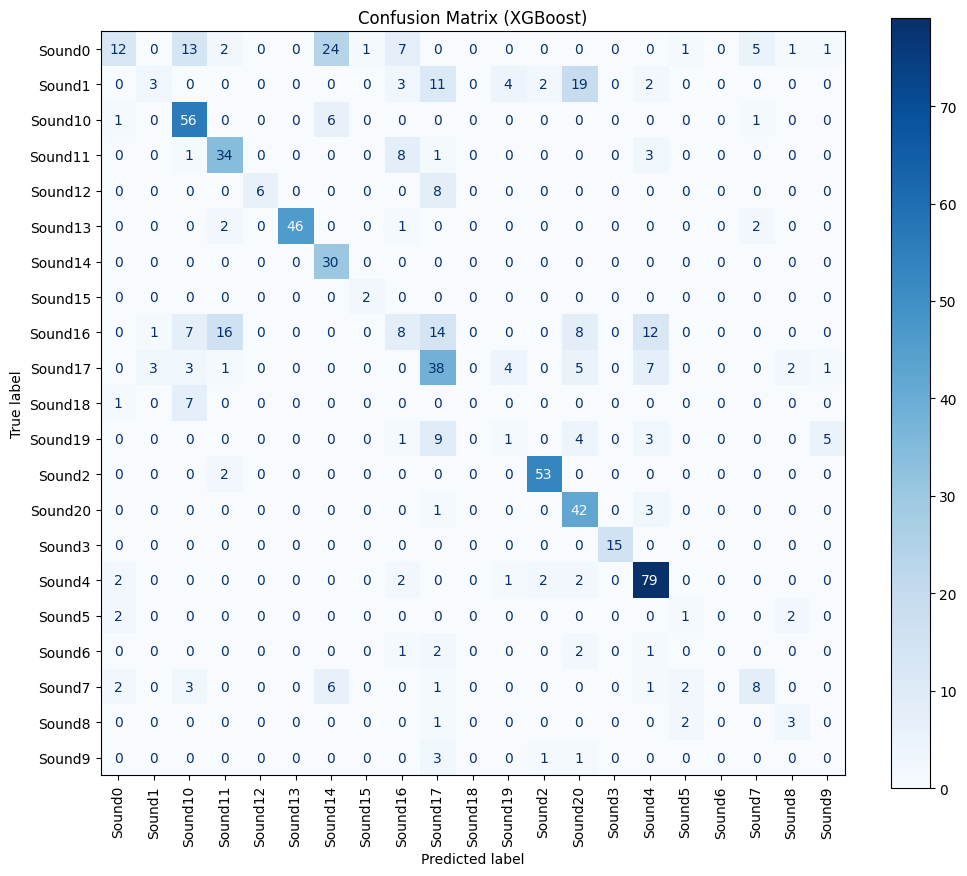

In [8]:
# 1. Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)  # Train model

# 2. Predict on test set
y_pred = xgb_model.predict(X_test)  # Predict test labels

# 3. Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 4. Visualize confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=90)
plt.title("Confusion Matrix (XGBoost)")
plt.show()